<a href="https://colab.research.google.com/github/CarllosLimma/Fisica_Computacional/blob/main/AtratorLorentz3d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

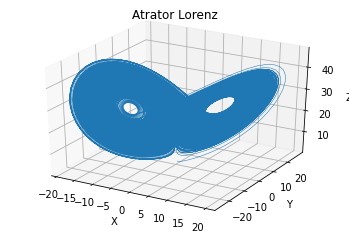

In [3]:
"""
Instituto de Física Universidade Feeral de Goiás (IF-UFG)
Autor: Carlos Eduardo da Silva Lima
Tema: Atrator Lorentz 3d
Data: 01/06/2021
Diciplina: Física Computacional
"""
# Inportando bibliotecas externa
import numpy as np
import matplotlib.pyplot as plt
# Parâmtros
s=10
r=28 
b=2.667
# EDO´s
def f1(t,x,y,z):
    return s*(y - x)
def f2(t,x,y,z):
    return r*x - y - x*z
def f3(t,x,y,z):
    return x*y - b*z
# Atributos para o métoo numérico e Runge-Kutta de 4Ordem
h = 0.01
N = 100000

# Variáveis
t = np.empty(N + 1)
x = np.empty(N + 1)
y = np.empty(N + 1)
z = np.empty(N + 1)
# Inicializando as váriaveis 
#t[0], x[0], y[0], z[0] = (0., 0., 1., 1.05)
t[0] = 0
x[0] = 0
y[0] = 1
z[0] = 1.05

for i in range(N):

    k11 = h*f1(t[i], x[i], y[i], z[i])
    k12 = h*f2(t[i], x[i], y[i], z[i])
    k13 = h*f3(t[i], x[i], y[i], z[i])
    k21 = h*f1(t[i] + (h/2), x[i] + (k11/2), y[i] + (k12/2), z[i] + (k13/2))
    k22 = h*f2(t[i] + (h/2), x[i] + (k11/2), y[i] + (k12/2), z[i] + (k13/2))
    k23 = h*f3(t[i] + (h/2), x[i] + (k11/2), y[i] + (k12/2), z[i] + (k13/2))
    k31 = h*f1(t[i] + (h/2), x[i] + (k21/2), y[i] + (k22/2), z[i] + (k23/2))
    k32 = h*f2(t[i] + (h/2), x[i] + (k21/2), y[i] + (k22/2), z[i] + (k23/2))
    k33 = h*f3(t[i] + (h/2), x[i] + (k21/2), y[i] + (k22/2), z[i] + (k23/2))
    k41 = h*f1(t[i] + h , x[i] + k31, y[i] + k32, z[i] + k33)
    k42 = h*f2(t[i] + h , x[i] + k31, y[i] + k32, z[i] + k33)
    k43 = h*f3(t[i] + h , x[i] + k31, y[i] + k32, z[i] + k33)
    x[i+1] = x[i] + ((k11 + 2*(k21 + k31) + k41)/6)
    y[i+1] = y[i] + ((k12 + 2*(k22 + k32) + k42)/6)
    z[i+1] = z[i] + ((k13 + 2*(k23 + k33) + k43)/6)
    t[i+1] = t[i] + h
    # Saída na tela
    #print("t = ",t[i]," || x = ",x[i]," || y = ",y[i]," || z = ",z[i])

# Gráfico
ax = plt.figure().add_subplot(projection='3d')
ax.plot(x, y, z, lw=0.5)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Atrator Lorenz")
plt.show()
